# CONNECTING GA4 TO PYTHON

In [1]:
import numpy as np
import pandas as pd
import os
from datetime import datetime, timedelta

In [2]:
from google.analytics.data_v1beta import BetaAnalyticsDataClient
from google.analytics.data_v1beta.types import (
    DateRange,
    Dimension,

    Metric,
    RunReportRequest,
    OrderBy,
    CohortSpec,
    Cohort,
    CohortsRange,
)

In [3]:
## Set up global variables

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = 'service_account.json'
property_id = '468166589'

client = BetaAnalyticsDataClient()


In [4]:
## Format Report - run_report method
def format_report(request):
    response = client.run_report(request)
    
    # Row index
    row_index_names = [header.name for header in response.dimension_headers]
    row_header = []
    for i in range(len(row_index_names)):
        row_header.append([row.dimension_values[i].value for row in response.rows])

    row_index_named = pd.MultiIndex.from_arrays(np.array(row_header), names = np.array(row_index_names))
    # Row flat data
    metric_names = [header.name for header in response.metric_headers]
    data_values = []
    for i in range(len(metric_names)):
        data_values.append([row.metric_values[i].value for row in response.rows])

    output = pd.DataFrame(data = np.transpose(np.array(data_values, dtype = 'f')), 
                          index = row_index_named, columns = metric_names)
    return output

# Active users by Country

In [29]:
today = datetime.today().strftime("%Y-%m-%d")
last_30_days = (datetime.today() - timedelta(days=30)).strftime("%Y-%m-%d")
request = RunReportRequest(
        property='properties/'+property_id,
        dimensions=[Dimension(name="country"), ],
        metrics=[Metric(name="activeUsers")],
        order_bys = [OrderBy(metric =OrderBy.MetricOrderBy(metric_name="activeUsers"), desc=True),
                    ],
        date_ranges=[DateRange(start_date=last_30_days, end_date="today")],
    limit=10
    )


In [26]:
 format_report(request)

,activeUsers
country,
Nigeria,1102.0
Egypt,1093.0
Sudan,973.0
Bangladesh,854.0
Algeria,843.0
Yemen,812.0
Iraq,739.0
Ethiopia,684.0
Pakistan,660.0


# campaign overview

In [5]:
request = RunReportRequest(
        property='properties/'+property_id,
        dimensions=[Dimension(name="campaignName")],
        metrics=[Metric(name="advertiserAdCost"),
                Metric(name="returnOnAdSpend"),
                Metric(name="totalRevenue")],
        order_bys = [OrderBy(metric =OrderBy.MetricOrderBy(metric_name="totalRevenue"), desc=True)],
        date_ranges=[DateRange(start_date="2022-06-01", end_date="today")],
    
    )

In [6]:
 format_report(request)

,advertiserAdCost,returnOnAdSpend,totalRevenue
campaignName,,,
Quran - Mashal Soft - Hybrid #2,653.014587,0.497699,325.004669
(not set),0.000000,0.000000,47.861771
Quran - Mashal Soft - Hybrid,249.150925,0.180700,45.021530
AL Quran - Mashal Soft - Hybrid,559.958923,0.040656,22.765596
Quran app Mashal Soft -All - ACI,142.916382,0.131907,18.851629
...,...,...,...
HS - GPS Navigation - India - 25-april-24,1.575182,0.000000,0.000000
HS - Live Satellite - tROAS - Brazil,1.370000,0.000000,0.000000
Sky - Recover Deleted Messages - CPI 3 Target,0.835068,0.000000,0.000000


# Top Traffic Sources

In [28]:
request = RunReportRequest(
        property='properties/'+property_id,
        dimensions=[Dimension(name="firstUserPrimaryChannelGroup")],
        metrics=[Metric(name="sessions"),
                Metric(name="totalUsers")],
        order_bys = [OrderBy(metric =OrderBy.MetricOrderBy(metric_name="totalUsers"), desc=True)],
        date_ranges=[DateRange(start_date="2022-06-01", end_date="today")],
    
    )


In [24]:
 format_report(request)

,sessions,totalUsers
firstUserPrimaryChannelGroup,,
Cross-network,76606.0,31468.0
Direct,11400.0,3578.0
Paid Search,11061.0,3442.0
Organic Search,8659.0,2710.0
Unassigned,19.0,20.0


# Weekly New User Trend

In [11]:

request = RunReportRequest(
        property='properties/'+property_id,
        dimensions=[Dimension(name="week")],
        metrics=[Metric(name="newUsers")],
        order_bys = [OrderBy(dimension =OrderBy.DimensionOrderBy(dimension_name="week"))],
        date_ranges=[DateRange(start_date="2025-01-01" , end_date="today")],
    
    )



In [13]:
df= format_report(request)
df


,newUsers
week,
01,1794.0
02,3441.0
03,3252.0
04,2190.0
05,4365.0
06,3628.0
07,2330.0


# Line Chart (New Users Over Time (Weekly))

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

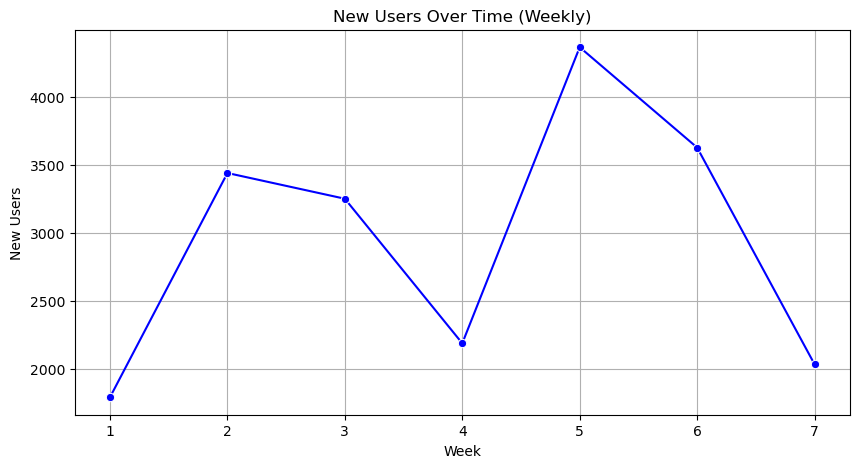

In [9]:
# Reset index to use "week" as a column
df = df.reset_index()


# Convert "week" to integer for proper sorting
df["week"] = df["week"].astype(int)

# Sort values by "week" to ensure correct order
df = df.sort_values(by="week")

# Plot using Seaborn
plt.figure(figsize=(10, 5))
sns.lineplot(x="week", y="newUsers", data=df, marker="o", linestyle="-", color="b")

# Add labels and title
plt.xlabel("Week")
plt.ylabel("New Users")
plt.title("New Users Over Time (Weekly)")
plt.grid(True)

# ✅ Save the plot BEFORE showing it
plot_filename = "new_users_plot.png"
plt.savefig(plot_filename, dpi=300, bbox_inches="tight")

# Show the plot
plt.show()



# saving plot and table in excel file

In [10]:

# Save table and plot into an Excel file
excel_filename = "GA4_New_Users_Report.xlsx"
with pd.ExcelWriter(excel_filename, engine="xlsxwriter") as writer:
    df.to_excel(writer, sheet_name="New Users Data", index=False)  # Save table
    worksheet = writer.sheets["New Users Data"]

    # Insert the plot into Excel
    worksheet.insert_image("D2", plot_filename)

print(f"Excel file '{excel_filename}' saved successfully with data & plot!")

Excel file 'GA4_New_Users_Report.xlsx' saved successfully with data & plot!


# Retention Cohort Report

In [84]:
# Define cohort start date
start_date = datetime(2025, 1, 1)  # First cohort starts Jan 1, 2025
num_weeks = 6  # Number of weekly cohorts

# Generate weekly cohorts dynamically
cohorts = []
for i in range(num_weeks):
    cohort_start = start_date + timedelta(weeks=i)
    cohort_end = cohort_start + timedelta(days=6)  # One full week
    cohorts.append(
        Cohort(
            name=f"Cohort_{i+1}",  # Name cohort as Cohort_1, Cohort_2, ...
            dimension="firstSessionDate",
            date_range=DateRange(start_date=cohort_start.strftime("%Y-%m-%d"), 
                                 end_date=cohort_end.strftime("%Y-%m-%d"))
        )
    )

# Define the cohort specification
cohort_spec = CohortSpec(
    cohorts=cohorts,
    cohorts_range=CohortsRange(granularity="WEEKLY", start_offset=0, end_offset=6)  # Retention over 6 weeks
)


# Define the request
request = RunReportRequest(
        property='properties/'+property_id,
    dimensions=[
        Dimension(name="cohort"),         # Weekly cohort grouping
        Dimension(name="cohortNthWeek")   # Number of weeks since first session
    ],
    metrics=[Metric(name="cohortActiveUsers")],  # Retained active users per week
    order_bys=[OrderBy(dimension=OrderBy.DimensionOrderBy(dimension_name="cohort"))],
    cohort_spec=cohort_spec
)

# Fetch the response
response = client.run_report(request)

In [85]:

# Process response into a DataFrame
data = []
for row in response.rows:
    cohort_label = row.dimension_values[0].value  # Weekly cohort label (Week_1, Week_2, etc.)
    week_number = int(row.dimension_values[1].value)  # Week since signup
    active_users = int(row.metric_values[0].value)  # Active users retained

    data.append([cohort_label, week_number, active_users])

# Create a DataFrame
df = pd.DataFrame(data, columns=["cohort", "week", "active_users"])

# Ensure unique (cohort, week) combinations by aggregating
df_grouped = df.groupby(["cohort", "week"], as_index=False).sum()

# Pivot the table to format it as a retention table
df_pivot = df_grouped.pivot(index="cohort", columns="week", values="active_users").fillna(0).astype(int)

# Print the final cohort retention table
print(df_pivot)

week         0    1    2    3    4    5   6
cohort                                     
Cohort_1  3345  525  295  228  226  151  57
Cohort_2  3345  526  329  250  221   75   0
Cohort_3  2786  410  297  208   72    0   0
Cohort_4  2666  491  260   71    0    0   0
Cohort_5  5085  753  228    0    0    0   0
Cohort_6  3030  261    0    0    0    0   0


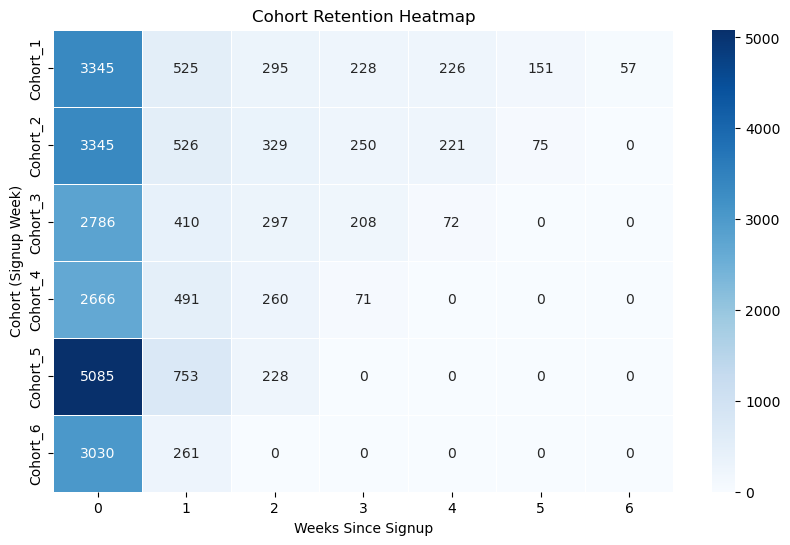

In [90]:

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a heatmap
sns.heatmap(df_pivot, annot=True, fmt="d", cmap="Blues", linewidths=0.5)

# Labels and title
plt.title("Cohort Retention Heatmap")
plt.xlabel("Weeks Since Signup")
plt.ylabel("Cohort (Signup Week)")

# ✅ Save the plot BEFORE showing it
plot_file = "Cohort_retention_heatmap.png"
plt.savefig(plot_filename, dpi=300, bbox_inches="tight")
# Show the plot
plt.show()


In [96]:
# Save table and plot into an Excel file
excel_file = "GA4_Cohort_retention_Report.xlsx"
with pd.ExcelWriter(excel_file, engine="xlsxwriter") as writer:
    df.to_excel(writer, sheet_name="Cohort Retention Report", index=False)  # Save table
    worksheet = writer.sheets["Cohort Retention Report"]

    # Insert the plot into Excel
    worksheet.insert_image("D2", plot_file)

print(f"Excel file '{excel_file}' saved successfully with data & plot!")


Excel file 'GA4_Cohort_retention_Report.xlsx' saved successfully with data & plot!


# Monthly Active Users by Session Medium Pivot Table

In [6]:
request = RunReportRequest(
        property='properties/'+property_id,
    dimensions=[
        Dimension(name="sessionMedium"),         
        Dimension(name="yearMonth")   
    ],
    metrics=[Metric(name="activeUsers")],  
    order_bys=[OrderBy(dimension=OrderBy.DimensionOrderBy(dimension_name="yearMonth"))],
    date_ranges=[DateRange(start_date="2024-06-01" , end_date="2025-02-01")]
)

# Fetch the response
response = client.run_report(request)

In [8]:
data = []
for row in response.rows:
    session_medium = row.dimension_values[0].value  # "sessionMedium"
    year_month = row.dimension_values[1].value      # "yearMonth"
    active_users = int(row.metric_values[0].value)  # "activeUsers"
    
    data.append([session_medium, year_month, active_users])

# Create DataFrame
df = pd.DataFrame(data, columns=["sessionMedium", "yearMonth", "activeUsers"])


df_pivot = pd.pivot_table(
    df,
    values="activeUsers",
    index="sessionMedium",
    columns="yearMonth",
    aggfunc="sum",
    fill_value=0  # Replace NaN with 0 for missing values
)
df_pivot

yearMonth,202411,202412,202501,202502
sessionMedium,,,,
(none),168,756,659,41
(not set),319,979,740,32
cpc,1902,17044,16897,1267
organic,56,1290,1419,87


# Compare last two Month's Performance

In [117]:
request = RunReportRequest(
        property='properties/'+property_id,
    dimensions=[        
        Dimension(name="yearMonth")   
    ],
    metrics=[Metric(name="activeUsers"),
            Metric(name="sessions"),
            Metric(name="newUsers"),
            Metric(name="bounceRate"),
            Metric(name="eventCount")],  
    order_bys=[OrderBy(dimension=OrderBy.DimensionOrderBy(dimension_name="yearMonth"))],
    date_ranges=[DateRange(start_date="2024-12-01" , end_date="2025-01-31")]
)

# Fetch the response
response = client.run_report(request)

In [118]:
data = []
for row in response.rows:
    year_month = row.dimension_values[0].value   # "yearMonth" (e.g., "202401")
    active_users = int(row.metric_values[0].value)   # "activeUsers"
    sessions = int(row.metric_values[1].value)       # "sessions"
    newusers = int(row.metric_values[2].value)   
    bouncerate = float(row.metric_values[3].value) 
    eventcount = int(row.metric_values[4].value) 

    data.append([year_month, active_users, sessions, newusers, bouncerate, eventcount])

# Create DataFrame
df = pd.DataFrame(data, columns=["yearMonth", "activeUsers", "sessions", "newusers", "bouncerate", "eventcount"])

# Convert "yearMonth" to datetime for sorting
df["yearMonth"] = pd.to_datetime(df["yearMonth"], format="%Y%m")


print(df)

   yearMonth  activeUsers  sessions  newusers  bouncerate  eventcount
0 2024-12-01        18997     45427     17619    0.135492     1042710
1 2025-01-01        18954     40037     14288    0.165172     1070485
